In [0]:
from pyspark.ml.clustering import KMeans, GaussianMixture
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt

In [0]:
filepath='/FileStore/tables/hw4/Iris_1_.csv'

In [0]:
df = spark.read.option("header",True).csv(filepath)

In [0]:
features = df.rdd.map(lambda x: (float(x[1]), float(x[2]), float(x[3]), float(x[4])))
label = df.rdd.map(lambda x: (float(x[0]), x[5][5:]))

In [0]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
features_df = features.toDF(columns)

In [0]:
vec_assembler = VectorAssembler(inputCols=[
'SepalLengthCm',
'SepalWidthCm',
'PetalLengthCm',
'PetalWidthCm'],outputCol = 'features')

In [0]:
assembled_data = vec_assembler.transform(features_df)

In [0]:
silhouette_scores=[]
eval_metric = ClusteringEvaluator(featuresCol='features', metricName='silhouette', distanceMeasure='squaredEuclidean')

for K in range(2,11):
    model = KMeans(featuresCol='features', k=K)
    fitted_model = model.fit(assembled_data)
    transformed_model = fitted_model.transform(assembled_data)
    eval_score = eval_metric.evaluate(transformed_model)
    silhouette_scores.append(eval_score)

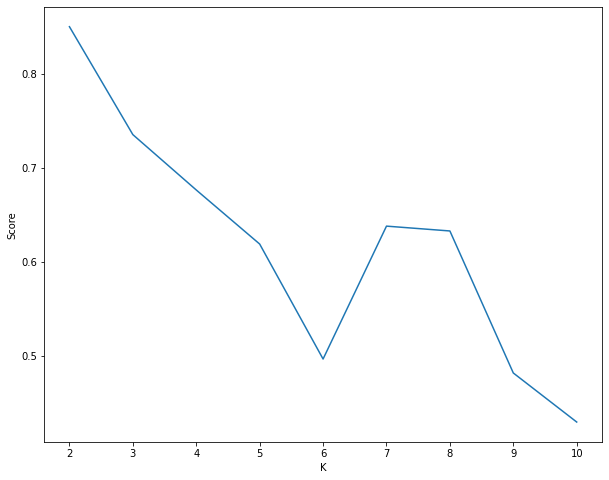

In [0]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [0]:
"""The silhouette score is a measure of clustering technique. The closer we are to a value of 1 indicates that clusters are far apart and distinguished from each other. Values closer to 0 indicate that distance between clusters is not significant. We want to maximize this difference. For our graph, we pick K=3 since it shows a local maximum. K=2 is not chosen because it is the starting point and K=1 throws an error when passing into the KMeans model from pyspark."""

Out[10]: 'The silhouette score is a measure of clustering technique. The closer we are to a value of 1 indicates that clusters are far apart and distinguished from each other. Values closer to 0 indicate that distance between clusters is not significant. We want to maximize this difference. For our graph, we pick K=3 since it shows a local maximum. K=2 is not chosen because it is the starting point and K=1 throws an error when passing into the KMeans model from pyspark.'

In [0]:
eval_metric = ClusteringEvaluator(featuresCol='features', metricName='silhouette', distanceMeasure='squaredEuclidean')

model = KMeans(featuresCol='features', k=3) 
fitted_model = model.fit(assembled_data)
transformed_model = fitted_model.transform(assembled_data)
eval_score = eval_metric.evaluate(transformed_model)
print(eval_score)


0.7354567373091194


In [0]:
gm = GaussianMixture(k=3, tol=0.0001, seed=10)
fitted_model = gm.fit(assembled_data)
transformed_model = fitted_model.transform(assembled_data)
eval_score = eval_metric.evaluate(transformed_model)
print(eval_score)

0.4299464936272208


In [0]:
"""Kmeans with K=3 gives a silhouette score of 0.73 and GaussianMixture with K=3 gives a silhouette score of 0.43. Since a value closer to 1 indicates that intercluster distance is maximized and intracluster distance is minimized, we should go with KMeans since it's sillhouette score is closer to 1 compared to the GaussianMixture model."""

Out[13]: "Kmeans with K=3 gives a silhouette score of 0.73 and GaussianMixture with K=3 gives a silhouette score of 0.43. Since a value closer to 1 indicates that intercluster distance is maximized and intracluster distance is minimized, we should go with KMeans since it's sillhouette score is closer to 1 compared to the GaussianMixture model."